In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [35]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
model = SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6333333333333333

In [37]:
# Transformer 
scaler = StandardScaler()
X_train_transfrom = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transfrom, y_train)

# Test
x_test_transform = scaler.transform(X_test)
model.predict(x_test_transform)

array([1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 2, 0, 2, 2])

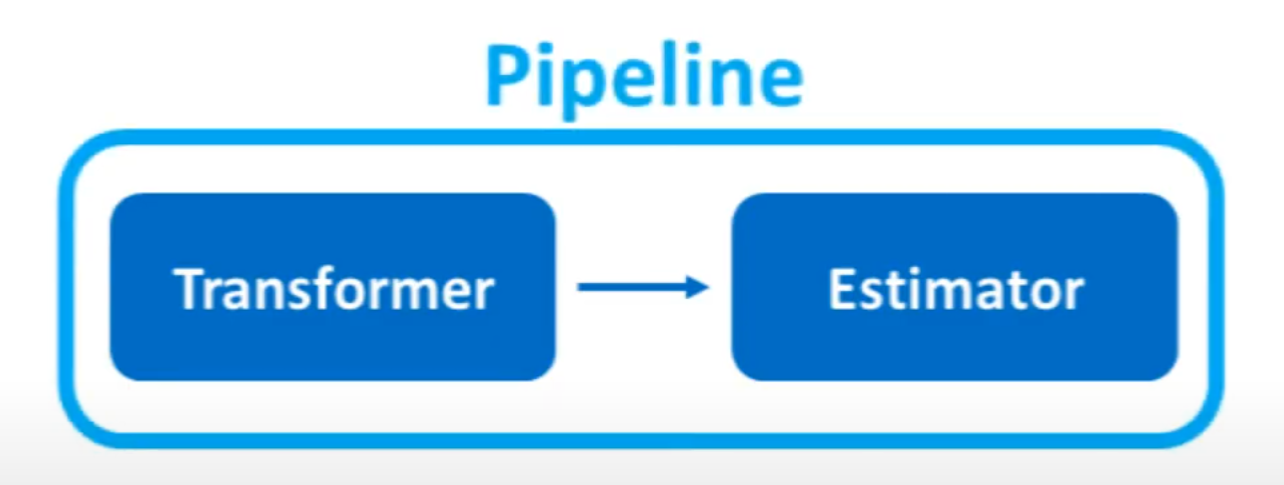

In [38]:
from sklearn.pipeline import make_pipeline

In [39]:
model = make_pipeline(StandardScaler(), SGDClassifier(random_state=0))
model.fit(X_train, y_train)
model.predict(X_test)

array([1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 2, 0, 2, 2])

In [ ]:
# Grid SreachCV

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [41]:
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))

In [42]:
params = {
    'polynomialfeatures__degree': [2, 3, 4],
    'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)
grid.best_params_

{'polynomialfeatures__degree': 3, 'sgdclassifier__penalty': 'l2'}

In [43]:
grid.best_score_

0.9833333333333334